# Credit Card Fraud Detection
## Internship Project - Group 6
Tatikonda Lakshman - AP19110010385

Kamisetty Smaran - AP1911001035

Dandibhotla Bala Pranav - AP19110010428

Katakam Akshay - AP19110010425

Batchu Raja Nithin- AP19110010495


# Our Approach

Cashless payments are the go to method of payments in this day and age. So, it is important for credit card companies to recognize any fraudulent credit card transactions so that customers are not charged for extra items.

# Context
The datasets contain transactions made by credit card European cardholders. This
dataset presents transactions that occurred in two days, where we have 492 frauds
out of 284,807 transactions. The dataset is highly unbalanced, the positive class
(frauds) account for 0.172% of all transactions.
It only contains numerical variables result of a PCA transformation. Features V1,
V2, ... V28 are the principal components obtained with PCA It has 'Time' and
'Amount' features. 'Time' contains the seconds elapsed between each transaction
and the first transaction. feature 'Amount' represents the transaction amount.
Feature 'Class' is the response variable and it gives value '1' in case of fraud and '0'
if the transaction is legitimate.

# Project Model
We will analyze our data between normal payment and fraudulent payments.
We are going to use two techniques to detect anomalies in our database, Isolation
Forest Algorithm and Local Outlier Factor Algorithm. We will also compare these
two techniques and analyse which technique is most effective in our context.
After comparing these two , we plot graphs for amount and normal cases (vs) fraud cases. 
We found mean ,sd and amount skewness and compare each variable using correlation matrix . Further Smote technique is used to balance the imbalanced dataset. 
We compare another 4 algorithms for the efficient way . 

# Isolation Forest Algorithm
The algorithm is based on the fact that anomalies are information focuses that are
not many and unique. 
Because of these properties, anomalies are vulnerable to an
instrument called isolation.
This method is exceptionally valuable and is generally not quite the same as all
existing methods. It introduces the use of isolation as a more effective and efficient
means to detect anomalies than the commonly used basic distance and density
measures. Moreover, this method is an algorithm with a low linear time complexity
and a small memory requirement. It constructs a good performing model with few
trees utilizing little sub-examples of fixed size, paying little heed to the size of an
data set.

How Isolation Forests Work The Isolation Forest algorithm isolates observations
by randomly selecting a feature and then randomly selecting a split value between
the maximum and minimum values of the selected feature. The logic argument
goes: isolating anomaly observations is easier because only a few conditions are
needed to separate those cases from the normal observations. On the other hand,
isolating normal observations requires more conditions. Therefore, an anomaly
score can be calculated as the number of conditions required to separate a given
observation.

The way that the algorithm constructs the separation is by first creating isolation
trees, or random decision trees. Then, the score is calculated as the path length to
isolate the observation.

# Local Outlier Factor(LOF) Algorithm
The LOF algorithm is an unsupervised outlier detection method which computes
the local density deviation of a given data point with respect to its neighbors. It
considers as outlier samples that have a substantially lower density than their
neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen

1) greater than the minimum number of objects a cluster has to contain, so that
other objects can be local outliers relative to this cluster.

2) smaller than the maximum number of close by objects that can potentially be
local outliers.

In practice, such information is generally not available, and taking
n_neighbors=20 appears to work well in general.

# Random forest classification 
The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.
Classification in random forests employs an ensemble methodology to attain the outcome.


# Decision Tree Classification 
Decision Tree is an algorithm used for supervised learning problems such as classification or regression. A decision tree or a classification tree is a tree in which each internal (non leaf) node is labeled with an input feature. The arcs coming from a node labeled with a feature are labeled with each of the possible values of the feature. Each leaf of the tree is labeled with a class or a probability distribution over the classes.

# Logistic Regression 
Logistic regression is basically a supervised classification algorithm. In a classification problem, the target variable(or output), y, can take only discrete values for given set of features(or inputs), X. Contrary to popular belief, logistic regression IS a regression model.
Logistic classification model is a binary classification model in which the conditional probability of one of the two possible realizations of the output variable is assumed to be equal to a linear combination of the input variables, transformed by the logistic function.

# SGD Classification 
Stochastic Gradient Descent (SGD) is a simple yet efficient optimization algorithm used to find the values of parameters/coefficients of functions that minimize a cost function.
It is used for discriminative learning of linear classifiers under convex loss functions such as SVM and Logistic regression.

# Data Set 

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [2]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

# Data Analysis

In [5]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

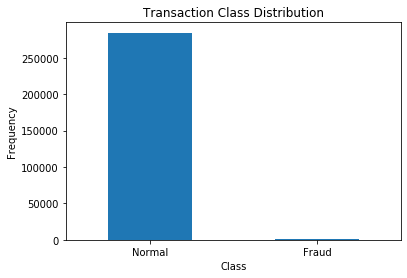

In [6]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [7]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [8]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [9]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

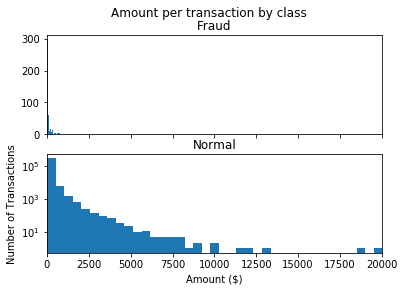

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

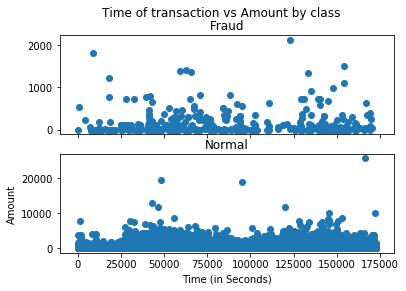

In [12]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [13]:
## Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(28481, 31)

In [14]:
data.shape

(284807, 31)

In [15]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [16]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


In [17]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [18]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)
  
   
}

In [19]:
type(classifiers)

dict

In [20]:
n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

C:\Users\D BALA PRANAV\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\D BALA PRANAV\Anaconda3\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


Isolation Forest: 73
Accuracy Score :
0.9974368877497279
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



We Compared both Isolation forest algorithm and Local Outlier Factor , now we will see some comparisions between Transaction amount of fraud and normal cases . Further we will find how much the amount is there and by taking further algorithms and compare them too.

In [21]:
max(data.Time)

172792.0

In [22]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [23]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

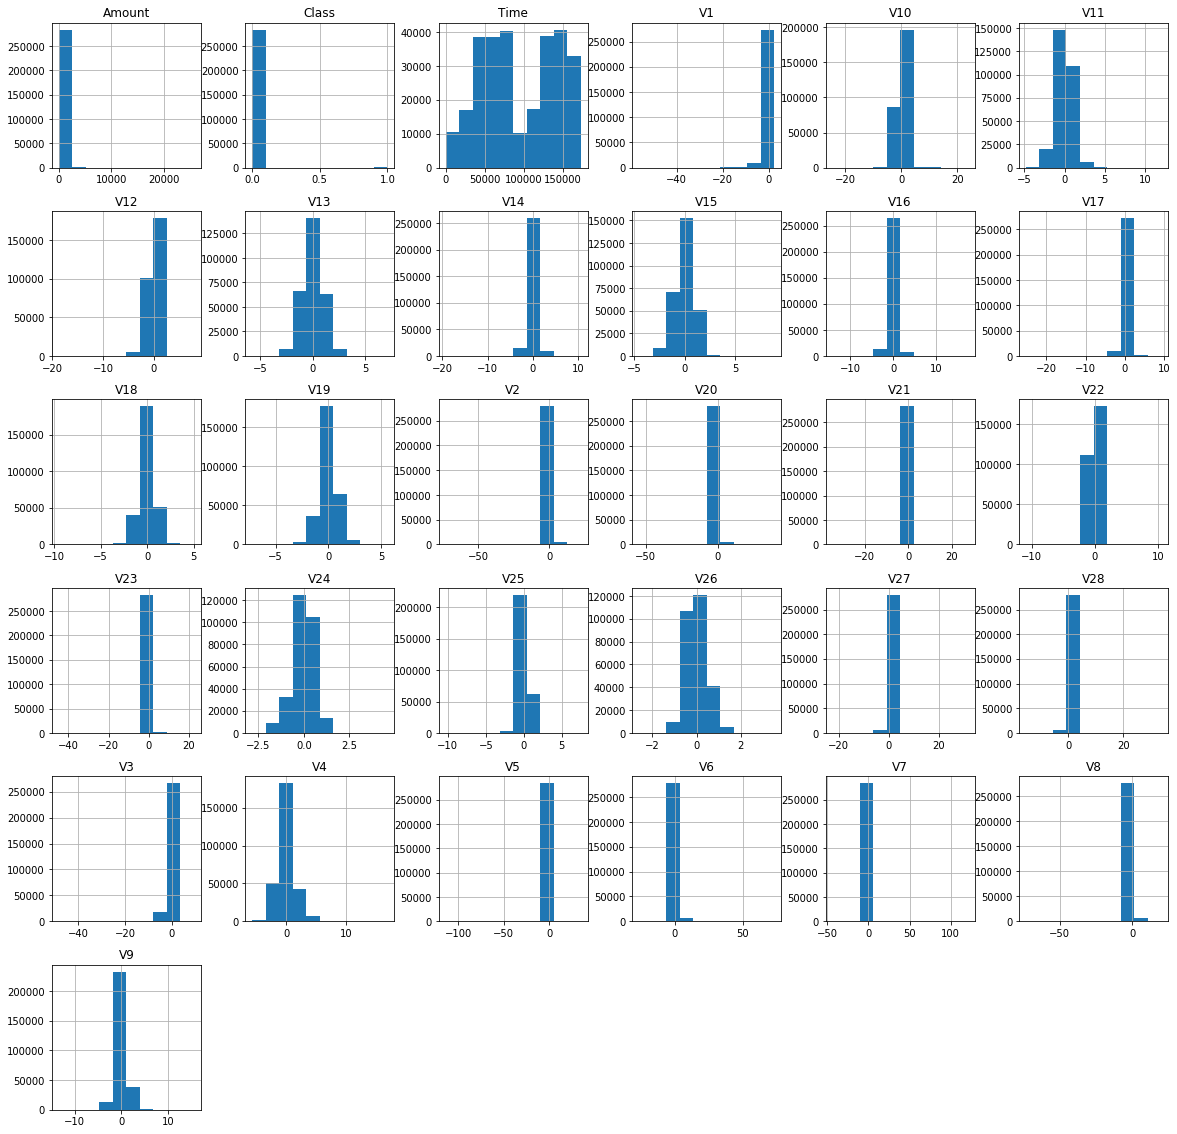

In [24]:
data.hist(figsize = (20, 20))
plt.show()

In [25]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [26]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [27]:
## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [28]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [29]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

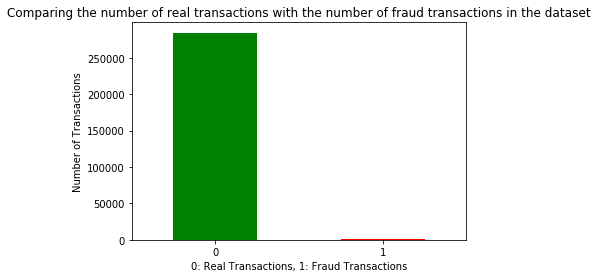

In [30]:
#Lets visualize this
data.Class.value_counts().plot(kind="bar", color=["Green", "Red"])
plt.xlabel("0: Real Transactions, 1: Fraud Transactions")
plt.ylabel("Number of Transactions")
plt.title("Comparing the number of real transactions with the number of fraud transactions in the dataset")
plt.xticks(rotation=0);

As you can see, the dataset is highly imbalanced which can significantly affect out ML model. A balanced dataset is best for training purposes

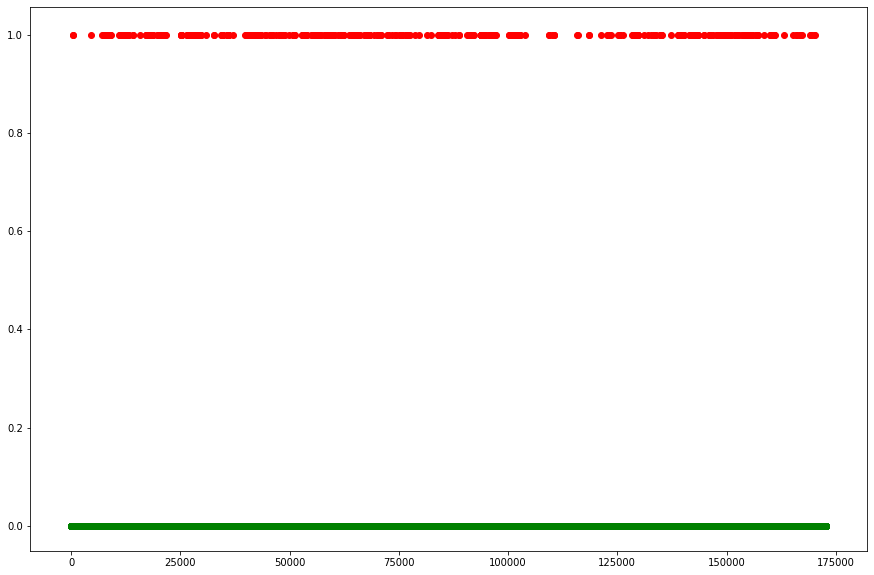

In [31]:
#See if the transactions occur at a given time period
plt.figure(figsize=(15,10))
plt.scatter(data.Time[data.Class==1], data.Class[data.Class==1], c="red")
plt.scatter(data.Time[data.Class==0], data.Class[data.Class==0], c="green");

In [32]:
max(data.Amount[data.Class==1]), min(data.Amount[data.Class==0])

(2125.87, 0.0)

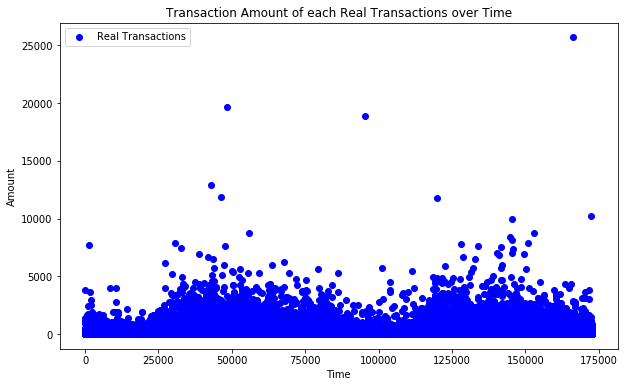

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(data.Time[data.Class==0],data.Amount[data.Class==0], color=["blue"])

plt.title("Transaction Amount of each Real Transactions over Time")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend(["Real Transactions"]);

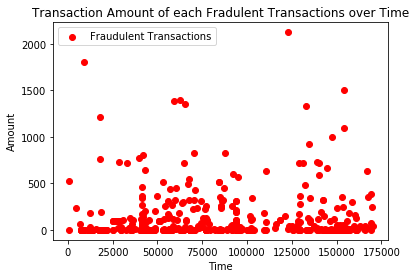

In [34]:
plt.scatter(data.Time[data.Class==1],data.Amount[data.Class==1], color=["red"])

plt.title("Transaction Amount of each Fradulent Transactions over Time")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend(["Fraudulent Transactions"]);

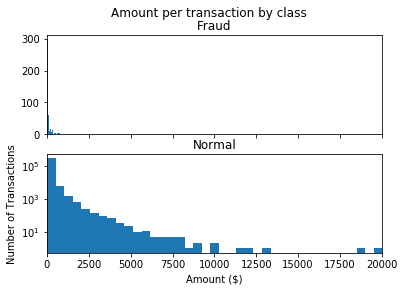

In [35]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

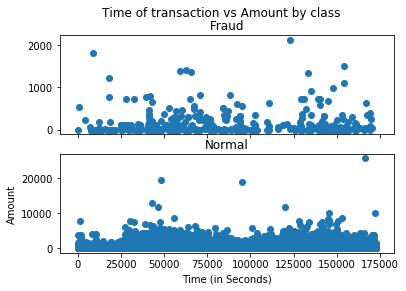

In [36]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

The Transaction amount for each fraudulent transaction is significantly lower compared to the Real transactions. This makes it a lot more difficult to detect fraud activities. The max amount is approxiamtely $2100

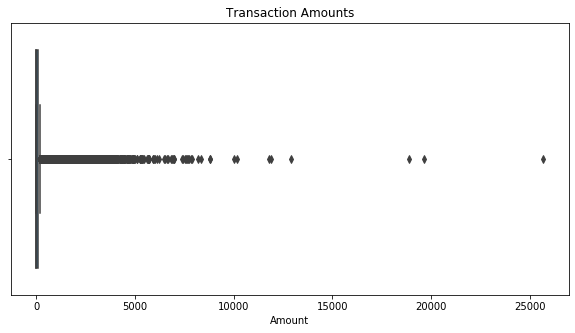

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(data["Amount"])
plt.title("Transaction Amounts");

In [38]:
data.Amount.skew()

16.977724453761024

The Amount is heavily right-skewed with a lot of outliers which we can fix using BoxCox transformation



# Lets look at the Mean and Standard Deviations for V1-V28 feature¶


In [39]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


We will visualize this !

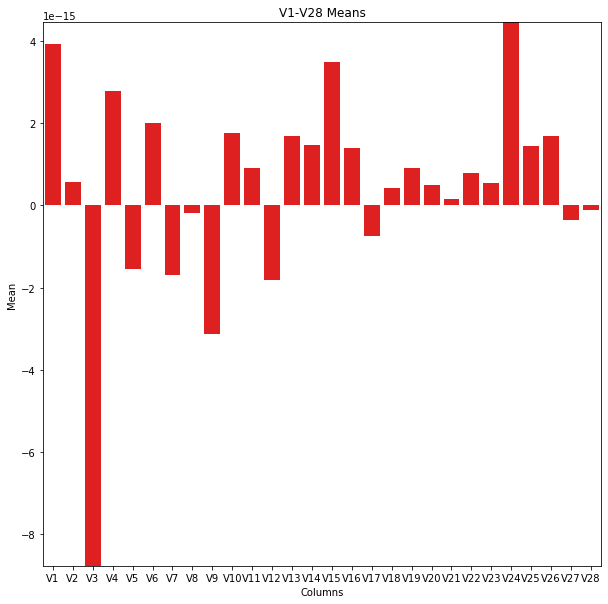

In [40]:
vs = data.drop(labels=["Time", "Amount","Class"], axis=1)

plt.figure(figsize=(10,10))
sns.barplot(x=vs.columns, y=vs.mean(), color="red")
plt.xlabel("Columns")
plt.ylabel("Mean")
plt.title("V1-V28 Means");

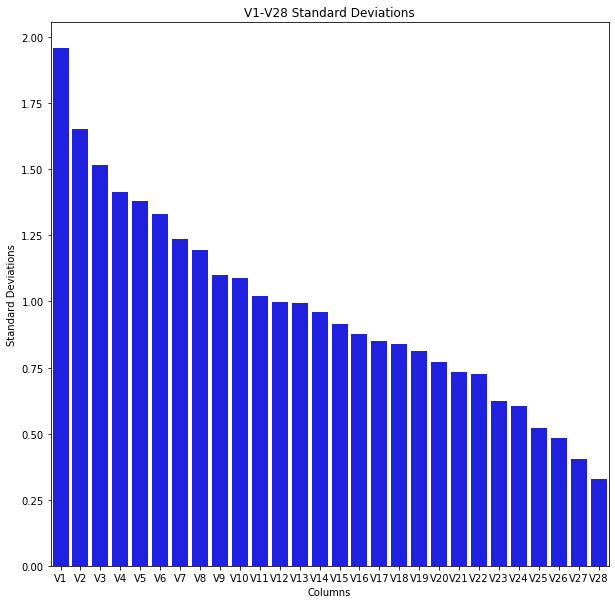

In [41]:
plt.figure(figsize=(10,10))
sns.barplot(x=vs.columns, y=vs.std(), color="blue")
plt.xlabel("Columns")
plt.ylabel("Standard Deviations")
plt.title("V1-V28 Standard Deviations");

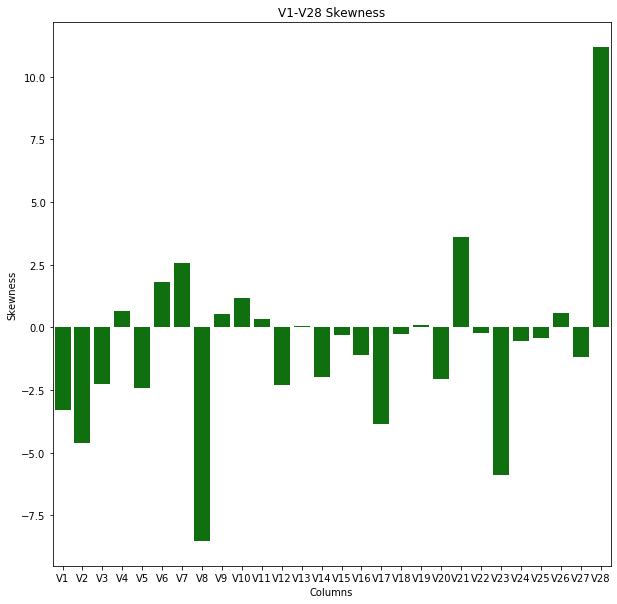

In [42]:
plt.figure(figsize=(10,10))
sns.barplot(x=vs.columns, y=vs.skew(), color="green")
plt.xlabel("Columns")
plt.ylabel("Skewness")
plt.title("V1-V28 Skewness");


# Correlation Matrix to see how each variable is related to each other and the target variable

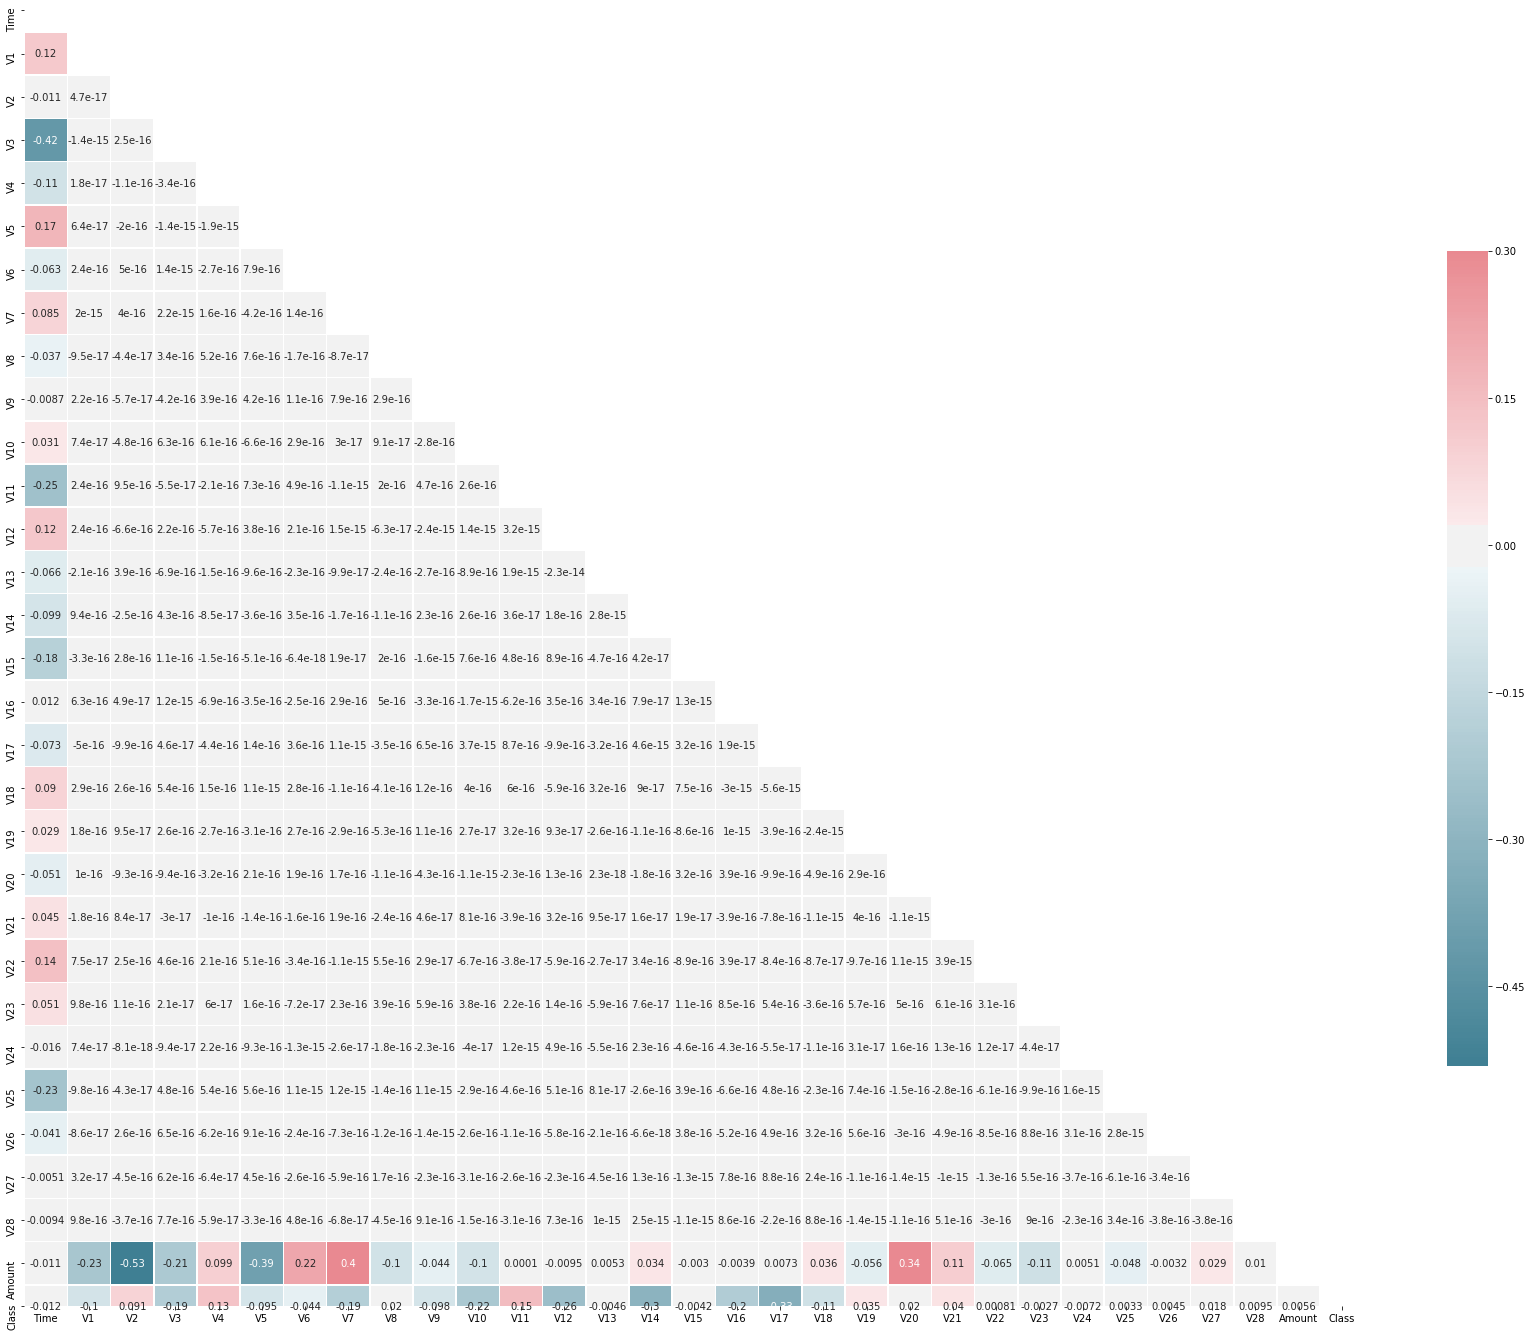

In [43]:
corr=data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});


# A correlation matrix only makes sense if the values are linear. Therefore, we are going to have to use other techniques to visualize and fit the data to the Machine Learning model

Lets use a mutual information to find the mutual dependence between two variables. It quantifies the "amount of information" obtained about one random variable through observing the other random variable. This is a better method compared to correlation matrix

In [44]:
X=data.drop("Class", axis=1)
y=data.Class
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((199364, 30), (85443, 30), (199364,), (85443,))

In [45]:
y_train.value_counts(), y_test.value_counts()

(0    199008
 1       356
 Name: Class, dtype: int64, 0    85307
 1      136
 Name: Class, dtype: int64)

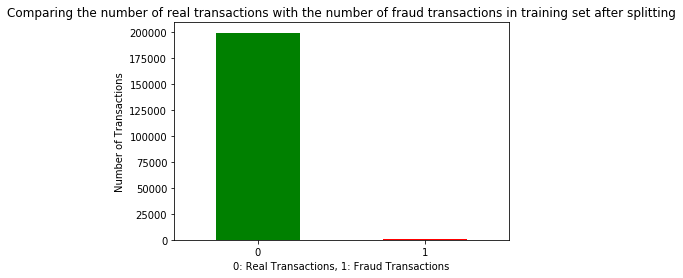

In [46]:
y_train.value_counts().plot(kind="bar", color=["Green", "Red"])
plt.xlabel("0: Real Transactions, 1: Fraud Transactions")
plt.ylabel("Number of Transactions")
plt.title("Comparing the number of real transactions with the number of fraud transactions in training set after splitting")
plt.xticks(rotation=0);

Standard Scalar 

In [47]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
X_train.shape, X_test.shape

((199364, 30), (85443, 30))

In [48]:
X_train[0]

array([-1.95144063, -1.16681856, -0.28654908,  0.53924737, -1.20368154,
        0.58967831, -1.23993846,  0.75411155, -0.45490037,  1.2064479 ,
       -0.39869658,  0.32182001,  0.58170129,  0.11222719, -0.22290476,
        1.38644463, -1.0221033 , -0.35174842, -0.7336555 , -0.49340827,
       -1.06710984, -0.28780091,  1.26352311,  1.37067196,  0.69925952,
        0.59643511, -1.6211327 ,  0.96676   , -0.4486209 , -0.33974783])

RobustScaler

In [49]:
rs=RobustScaler()
X_train=rs.fit_transform(X_train)
X_test=rs.transform(X_test)
X_train.shape, X_test.shape

((199364, 30), (85443, 30))

Smote balances the dataset 

Text(0.5, 1.0, 'Count of "Class" feature in training set after SMOTE')

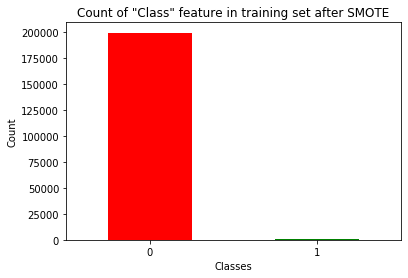

In [50]:
lol=pd.DataFrame(data=y_train, columns=["Class"])
lol.Class.value_counts().plot.bar(color=["Red", "Green"]);
plt.xlabel("Classes")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title("Count of \"Class\" feature in training set after SMOTE")

In [51]:
models={"Logistic Regression":LogisticRegression(), 
        "SGDClassifier":SGDClassifier(),
        "RFC": RandomForestClassifier(), 
        "Decision Tree":DecisionTreeClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given ML models
    
    models: dictionary of different Scikit-Learn ML models
    X_train: training data (no labels)
    X_test: test data (no labels)
    y_train: training data (target values)
    y_test: test data(predictions)
    """
    #Set random seed
    np.random.seed(42)
    
    #Make a dictionary to keep model scores
    model_scores={}
    
    #Loop through the models and fit the model to data
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test, y_test)
    
    return model_scores

In [52]:
model_scores=fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\D BALA PRANAV\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'Logistic Regression': 0.9992743700478681,
 'SGDClassifier': 0.9989583699074237,
 'RFC': 0.999602073897218,
 'Decision Tree': 0.9991807403766253}

# Comparision

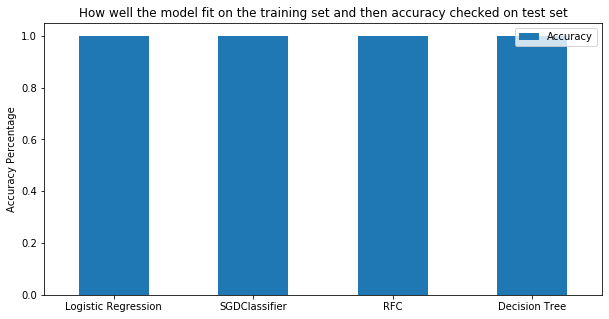

In [53]:
model_compare=pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar(figsize=(10,5)) 
plt.title("How well the model fit on the training set and then accuracy checked on test set")
plt.ylabel("Accuracy Percentage")
plt.xticks(rotation=0);

Let's try out every model and see how accurate the predictions

In [54]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.63      0.74       136

    accuracy                           1.00     85443
   macro avg       0.94      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



C:\Users\D BALA PRANAV\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [55]:
model=SGDClassifier()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.85      0.52      0.65       136

    accuracy                           1.00     85443
   macro avg       0.92      0.76      0.82     85443
weighted avg       1.00      1.00      1.00     85443



In [56]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.71      0.78      0.74       136

    accuracy                           1.00     85443
   macro avg       0.86      0.89      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [57]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
y_preds_prob=model.predict_proba(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.82      0.88       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443



# Observations:
Isolation Forest detected 73 errors versus Local Outlier Factor detecting 97 errors vs. SVM detecting 8516 errors
Isolation Forest has a 99.74% more accurate than LOF of 99.65% and SVM of 70.09
When comparing error precision & recall for 3 models, the Isolation Forest performed much better than the LOF as we can see that the detection of fraud cases is around 27 % versus the LOF detection rate of just 2 % and SVM of 0%.
So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%.

StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.
RobustScaler transforms the feature vector by subtracting the median and then dividing by the interquartile range (75% value — 25% value). Like MinMaxScaler, our feature with large values — normal-big — is now of similar scale to the other features.

Logistic regression has macro average of f1 score is 0.87 where as sGD has 0.82 , Decision tree has 0.87 and RFC have 0.94. 
So Random forest classifier is the best in these 4 ways to find fraud detection.


We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense. We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases